# ABOVE AC9 Data Processing
## Part 4: Fitting a Slope to the Spectra
**Authors:** Catherine Kuhn and Elena Terzić   
**Last Updated:** August, 15th, 2018

## Spectral slopes

In [24]:
### Import the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import glob
import os
import sys
import csv
from scipy import interpolate
from os import listdir
from os.path import isfile, join
import matplotlib.gridspec as gridspec
import statsmodels.formula.api as sm
from scipy import stats
from decimal import Decimal
import scipy
from scipy.optimize import curve_fit
import sympy as sym

In [25]:
%cd /Users/ckuhn/Documents/ABOVE/Data/AC9/ac9_data/

/Users/ckuhn/Documents/ABOVE/Data/AC9/ac9_data


In [26]:
plotfiles = sorted(glob.glob('3_t_s_corrected/*'))

In [27]:
#plotfiles

In [28]:
mypath    = '3_t_s_corrected'

In [29]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

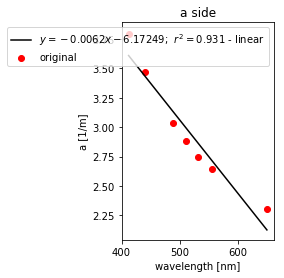

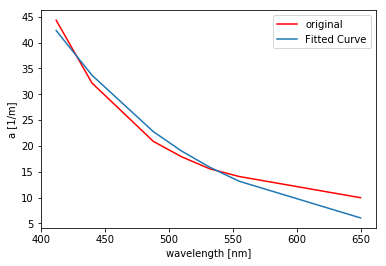

In [30]:
for file in range(len(plotfiles)):
    df = pd.read_csv(plotfiles[file], skiprows = 0, delimiter= '\t')
    wl = df['wl']
    wl_a = wl_c = wl
    a_corrected = df['a_corrected']
    c_corrected = df['c_corrected']
    
    # Find the indexes for the range 412 - 676 nm
    subset = np.where(wl > 660.)
    subset = np.where((wl >= 412.) & (wl <= 676.))
    idx_min = np.amin(subset);
    idx_max = np.amax(subset)
    
    index_440 = np.where((wl >= 439.) & (wl <= 444.))
    a_440 = a_corrected[index_440[0]]
    wl_ref = wl[index_440[0]]
    
    x = wl_a[idx_min:idx_max]
    y_log = np.log(a_corrected[idx_min:idx_max])
    y = a_corrected[idx_min:idx_max]
    
    plt.figure()
    plt.subplot(1,2,1)
    if 'AC9' in plotfiles[file]:
        plt.scatter(x, y_log, c = 'r', label = 'original')
    else:
        plt.plot(x, y_log, 'r', label = 'original')
    plt.xlabel('wavelength [nm]')
    plt.ylabel('a [1/m]')
    plt.title('a side')
    
    
    ############### Linear regression - with log transformed values   #####################
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y_log)
    
    r_sq_dec = Decimal(r_value**2)
    r_sq = round(r_sq_dec, 3)

    # Calculate some additional outputs
    predict_y = intercept + slope * x

    label_reg = '$y=%3.7sx-%3.7s$'%(slope, abs(intercept)) + ';  $r^2=%3.5s$'%(r_sq)
    plt.plot(x, predict_y, 'k-', label = label_reg + ' - linear')
    plt.legend()
    plt.show()
    
#    ############################## Exponential fit #######################################
#
#    plt.figure()
#    if 'AC9' in plotfiles[file]:
#        plt.scatter(x, y, c = 'm', label = 'original')
#    else:
#        plt.plot(x, y, 'm', label = 'original')
#    plt.xlabel('wavelength [nm]')
#    plt.ylabel('a [1/m]')
#    plt.title('a side')
    

    def func(x, a, b):
        return a * np.exp(-b * (x-440.))

    popt, pcov = curve_fit(func, x, y)
    plt.figure()
    plt.plot(x, y, 'r', label = 'original')
    plt.xlabel('wavelength [nm]')
    plt.ylabel('a [1/m]')
    plt.plot(x, func(x, *popt), label="Fitted Curve")
    plt.legend()
    plt.show() 